<a href="https://colab.research.google.com/github/Sinudeshmukh/PYTHON-CODES/blob/main/lin_reg_assgn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [28]:
data=pd.read_csv("50_Startups.csv")

In [29]:
data

,RandD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [30]:
data1=data.drop('State',1)

In [31]:
data1

,RandD,Administration,Marketing,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [32]:
data1.corr()

,RandD,Administration,Marketing,Profit
RandD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


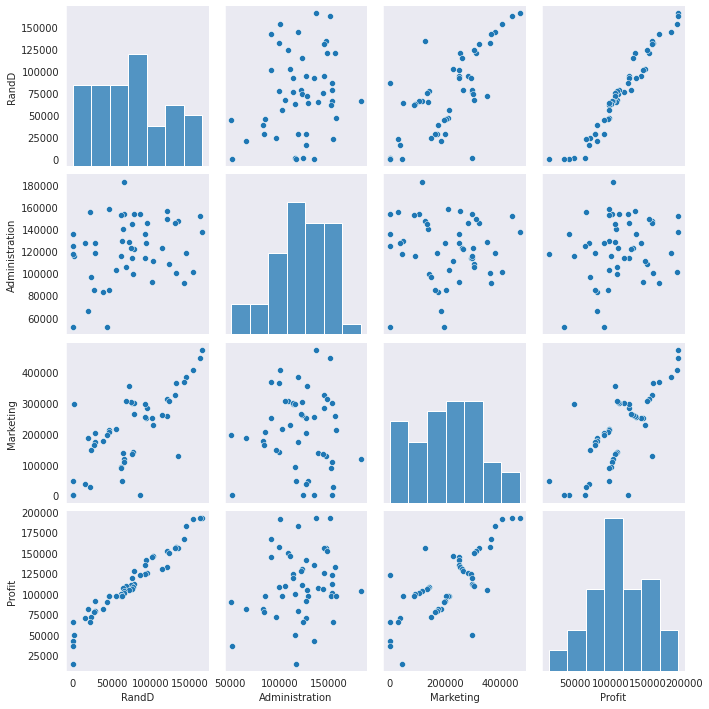

In [33]:
sns.set_style('dark')
sns.pairplot(data1)

#Built Model

In [34]:
import statsmodels.formula.api as smf
model=smf.ols('Profit ~Administration+Marketing+RandD',data=data1).fit()

In [35]:
#coeff

In [36]:
model.params

Intercept         50122.192990
Administration       -0.026816
Marketing             0.027228
RandD                 0.805715
dtype: float64

In [37]:
#tvalues and pvalues

In [40]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
Administration    -0.525507
Marketing          1.655077
RandD             17.846374
dtype: float64 
 Intercept         1.057379e-09
Administration    6.017551e-01
Marketing         1.047168e-01
RandD             2.634968e-22
dtype: float64


In [41]:
#rsquared and adj_rsquared
model.rsquared,model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

#Predict New Values

In [43]:
new_data=pd.DataFrame({'Administration':150000,'Marketing':500000,'RandD':100000},index=[1])

In [44]:
new_data

,Administration,Marketing,RandD
1,150000,500000,100000


In [45]:
model.predict(new_data)

1    140285.335123
dtype: float64

In [46]:
model.predict(data1)

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
